<a href="https://colab.research.google.com/github/VaidehiMagare/AUTOMATED-REPORT-GENERATION/blob/main/Automated_Report_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Creating a file
import pandas as pd

data = {
    "Date" : ["23-06-2025", "23-06-2025", "26-06-2025", "26-06-2025"],
    "Product" : ["Product A", "Product B", "Product A", "Product B"],
    "Units sold" : [15, 20, 25, 30],
    "Units price" : [10, 20, 30, 40]
}

df = pd.DataFrame(data)

# Save the file to csv
df.to_csv("sales_data.csv", index=False)

# Printing the file
print("sales_data.csv file is created ✅")

sales_data.csv file is created ✅


In [3]:
df = pd.read_csv("sales_data.csv")
df

,Date,Product,Units sold,Units price
0,23-06-2025,Product A,15,10
1,23-06-2025,Product B,20,20
2,26-06-2025,Product A,25,30
3,26-06-2025,Product B,30,40


In [4]:
df["Revenue"] = df["Units sold"] * df["Units price"]

summary = df.groupby("Product").agg({
    "Units sold" : "sum",
    "Revenue" : "sum"
}).reset_index()

print (df.columns)
summary

Index(['Date', 'Product', 'Units sold', 'Units price', 'Revenue'], dtype='object')


,Product,Units sold,Revenue
0,Product A,40,900
1,Product B,50,1600


In [5]:
!pip install fpdf

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=0b9447dcfb2a2f96e8382702f94f8195a0fcc3d17f6cb59b68ff8599a50bd6ff
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf


In [6]:
from fpdf import FPDF

class pdf_report(FPDF):

  def header(self):
    self.set_font("Arial", "B", 18)
    self.cell(0, 10, "Sales Report", ln=True, align='C')
    self.ln(10)

  def footer(self):
    self.set_y(-15)
    self.set_font("Arial", "I", 8)
    self.cell(0, 10, f"Page {self.page_no()}", align='C')

  def add_summary_table(self, data_frame):
    self.set_font("Arial", 'B', 12)
    self.cell(60, 10, "Product", border=1)
    self.cell(40, 10, "Units sold", border=1)
    self.cell(40, 10, "Revenue", border=1)
    self.ln()

    self.set_font("Arial", "", 12)
    for i, row in data_frame.iterrows():
      self.cell(60, 10, row["Product"], border=1)
      self.cell(40, 10, str(row["Units sold"]), border=1)
      self.cell(40, 10, f"${row['Revenue']:.2f}", border=1)
      self.ln()

In [7]:
pdf = pdf_report()
pdf.add_page()
pdf.add_summary_table(summary)
pdf.output("sales_report.pdf")

''

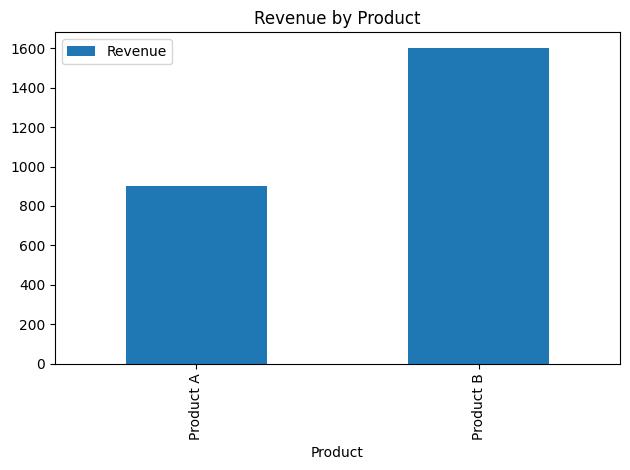

In [8]:
import matplotlib.pyplot as plt

# Plot and save
summary.plot(kind='bar', x='Product', y='Revenue', title='Revenue by Product')
plt.tight_layout()
plt.savefig('chart.png')

# Add to PDF
pdf.image('chart.png', x=10, y=None, w=180)


In [9]:
from google.colab import files
files.download("sales_report.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>